# PadChest-GR Dataset Analysis

This notebook analyzes the PadChest-GR dataset, specifically the master table and grounded reports.

In [2]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

# Set paths
dataset_dir = 'dataset'
csv_path = os.path.join(dataset_dir, 'master_table.csv')
json_path = os.path.join(dataset_dir, 'grounded_reports_20240819.json')


## Load Master Table (CSV)

In [3]:
# Check if CSV exists, otherwise try zip
if not os.path.exists(csv_path) and os.path.exists(csv_path + '.zip'):
    print(f"Loading {csv_path}.zip...")
    df = pd.read_csv(csv_path + '.zip')
else:
    print(f"Loading {csv_path}...")
    df = pd.read_csv(csv_path)

print(f"Shape: {df.shape}")
df.head()

Loading dataset/master_table.csv...
Shape: (8787, 23)


,StudyID,ImageID,label,boxes_count,extra_boxes_count,locations,prior_study,progression_status,prior_imageID,sentence_en,...,split,PatientID,patient_is_benchmark,PatientBirth,PatientSex_DICOM,StudyDate_DICOM,StudyDate,PatientAge,label_group,Year
0,251488034557732338959601580328898734705,251488034557732338959601580328898734705_wigcpj...,apical pleural thickening,2,2,['pleural'],False,NaN,NaN,Minimal biapical pleural thickening.,...,test,243089588168270594079245995953840813067,True,1950,F,20141114,2014,64,pleural thickening,2014
1,251488034557732338959601580328898734705,251488034557732338959601580328898734705_wigcpj...,costophrenic angle blunting,0,0,"['left costophrenic angle', 'costophrenic angle']",False,NaN,NaN,Slight blunting of the posterior left costophr...,...,test,243089588168270594079245995953840813067,True,1950,F,20141114,2014,64,pleural effusion,2014
2,109876241481532572619807710001909166420,109876241481532572619807710001909166420_dln48o...,Normal,0,0,[],True,NaN,216840111366964013217898866992011328080029653_...,NaN,...,train,202199914138297148429337408346379454019,True,1947,M,20140819,2014,67,Normal,2014
3,312447841912476392836878255221324752437,312447841912476392836878255221324752437_m4dphn...,mediastinic lipomatosis,1,0,"['cardiac', 'right', 'cardiophrenic angle']",False,NaN,NaN,Occupation of the right cardiophrenic angle pr...,...,validation,241659208169457881488090557648675833268,True,1955,M,20141230,2014,59,Other Entities,2014
4,312447841912476392836878255221324752437,312447841912476392836878255221324752437_m4dphn...,superior mediastinal enlargement,1,0,"['mediastinum', 'superior mediastinum']",False,NaN,NaN,Slight widening of the superior mediastinum.,...,validation,241659208169457881488090557648675833268,True,1955,M,20141230,2014,59,Other Entities,2014


In [4]:
df.columns

Index(['StudyID', 'ImageID', 'label', 'boxes_count', 'extra_boxes_count',
       'locations', 'prior_study', 'progression_status', 'prior_imageID',
       'sentence_en', 'sentence_es', 'study_is_benchmark',
       'study_is_validation', 'split', 'PatientID', 'patient_is_benchmark',
       'PatientBirth', 'PatientSex_DICOM', 'StudyDate_DICOM', 'StudyDate',
       'PatientAge', 'label_group', 'Year'],
      dtype='str')

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   StudyID               8787 non-null   str   
 1   ImageID               8787 non-null   str   
 2   label                 8787 non-null   str   
 3   boxes_count           8787 non-null   int64 
 4   extra_boxes_count     8787 non-null   int64 
 5   locations             8787 non-null   str   
 6   prior_study           8787 non-null   bool  
 7   progression_status    664 non-null    str   
 8   prior_imageID         3186 non-null   str   
 9   sentence_en           7331 non-null   str   
 10  sentence_es           7331 non-null   str   
 11  study_is_benchmark    8787 non-null   bool  
 12  study_is_validation   8787 non-null   bool  
 13  split                 8787 non-null   str   
 14  PatientID             8787 non-null   object
 15  patient_is_benchmark  8787 non-null   bool  
 16 

## Null Value Analysis

In [6]:
# Calculate null values and percentages
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a dataframe for better visualization
null_df = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentages})

# Display columns with null values
print("Columns with null values:")
print(null_df[null_df['Null Count'] > 0].sort_values('Percentage', ascending=False))


print(f"\nNull values:\n{df.isnull().sum()}")

Columns with null values:
                    Null Count  Percentage
progression_status        8123   92.443382
prior_imageID             5601   63.741891
sentence_en               1456   16.569933
sentence_es               1456   16.569933

Null values:
StudyID                    0
ImageID                    0
label                      0
boxes_count                0
extra_boxes_count          0
locations                  0
prior_study                0
progression_status      8123
prior_imageID           5601
sentence_en             1456
sentence_es             1456
study_is_benchmark         0
study_is_validation        0
split                      0
PatientID                  0
patient_is_benchmark       0
PatientBirth               0
PatientSex_DICOM           0
StudyDate_DICOM            0
StudyDate                  0
PatientAge                 0
label_group                0
Year                       0
dtype: int64


## Duplicate Analysis

In [7]:
# Check for full row duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Check for duplicate ImageIDs (should be unique ideally)
print(f"Duplicate ImageIDs: {df['ImageID'].duplicated().sum()}")

# Check for StudyIDs (multiple images per study is common)
print(f"Duplicate StudyIDs: {df['StudyID'].duplicated().sum()}")

Duplicate Rows: 0
Duplicate ImageIDs: 4232
Duplicate StudyIDs: 4232


## Image Existence Verification

In [8]:
import os

# Define image directory
image_dir = 'dataset/Padchest_GR_files/PadChest_GR'

# Get unique ImageIDs from dataframe
unique_image_ids = df['ImageID'].unique()
print(f"Total Unique ImageIDs in CSV: {len(unique_image_ids)}")

# Check for existence
missing_images = []
existing_count = 0

# Check first few to detect extension pattern
print(f"Checking image directory: {image_dir}")
if os.path.exists(image_dir):
    print("Directory exists.")
else:
    print("Directory NOT found. Please check the path.")

for img_id in unique_image_ids:
    # Check exact match or with common extensions
    # Note: dataset usually has png/jpg files
    found = False
    for ext in ['', '.png', '.jpg']:
        if os.path.exists(os.path.join(image_dir, img_id + ext)):
            found = True
            break
    
    if found:
        existing_count += 1
    else:
        missing_images.append(img_id)

print(f"Found Images: {existing_count}")
print(f"Missing Images: {len(missing_images)}")

if len(missing_images) > 0:
    print(f"Example missing IDs: {missing_images[:5]}")

Total Unique ImageIDs in CSV: 4555
Checking image directory: dataset/Padchest_GR_files/PadChest_GR
Directory exists.
Found Images: 4555
Missing Images: 0


## Load Grounded Reports (JSON)

In [9]:
print(f"Loading {json_path}...")
with open(json_path, 'r') as f:
    grounded_data = json.load(f)

print(f"Number of records in JSON: {len(grounded_data)}")

Loading dataset/grounded_reports_20240819.json...
Number of records in JSON: 4555


In [10]:
# Inspect the first item
if len(grounded_data) > 0:
    print(json.dumps(grounded_data[0], indent=2))

{
  "PreviousStudyID": null,
  "PreviousImageID": null,
  "findings": [
    {
      "sentence_en": "Minimal biapical pleural thickening.",
      "sentence_es": "M\u00ednimo engrosamiento pleural biapical.",
      "abnormal": true,
      "boxes": [
        [
          0.27670749,
          0.10440252,
          0.48518978,
          0.18993711
        ],
        [
          0.55240538,
          0.08930818,
          0.76772316,
          0.20251572
        ]
      ],
      "extra_boxes": [
        [
          0.21181802,
          0.07398137,
          0.50205083,
          0.2139724
        ],
        [
          0.54713554,
          0.08486956,
          0.77537688,
          0.2139724
        ]
      ],
      "labels": [
        "apical pleural thickening"
      ],
      "locations": [
        "pleural"
      ],
      "progression": null
    },
    {
      "sentence_en": "Slight blunting of the posterior left costophrenic angle.",
      "sentence_es": "Discreto pinzamiento posterio

## Dataset Integration Check

In [11]:
# Cross-analysis between CSV and JSON
print("=== INTEGRATION CHECK ===")
print(f"Master table rows: {len(df)}")
print(f"Grounded reports records: {len(grounded_data)}")

# Use 'ImageID' as the common identifier
if 'ImageID' in df.columns and len(grounded_data) > 0 and 'ImageID' in grounded_data[0]:
    csv_ids = set(df['ImageID'].unique())
    json_ids = set(record['ImageID'] for record in grounded_data)

    overlap = len(csv_ids & json_ids)
    print(f"\nCommon IDs: {overlap}")
    print(f"CSV-only IDs: {len(csv_ids - json_ids)}")
    print(f"JSON-only IDs: {len(json_ids - csv_ids)}")
    
    if len(json_ids - csv_ids) > 0:
        print("Warning: Some JSON records are not in the master table!")
else:
    print("Error: 'ImageID' column not found in one of the datasets.")

=== INTEGRATION CHECK ===
Master table rows: 8787
Grounded reports records: 4555
Error: 'ImageID' column not found in one of the datasets.


## Patient Demographics Analysis

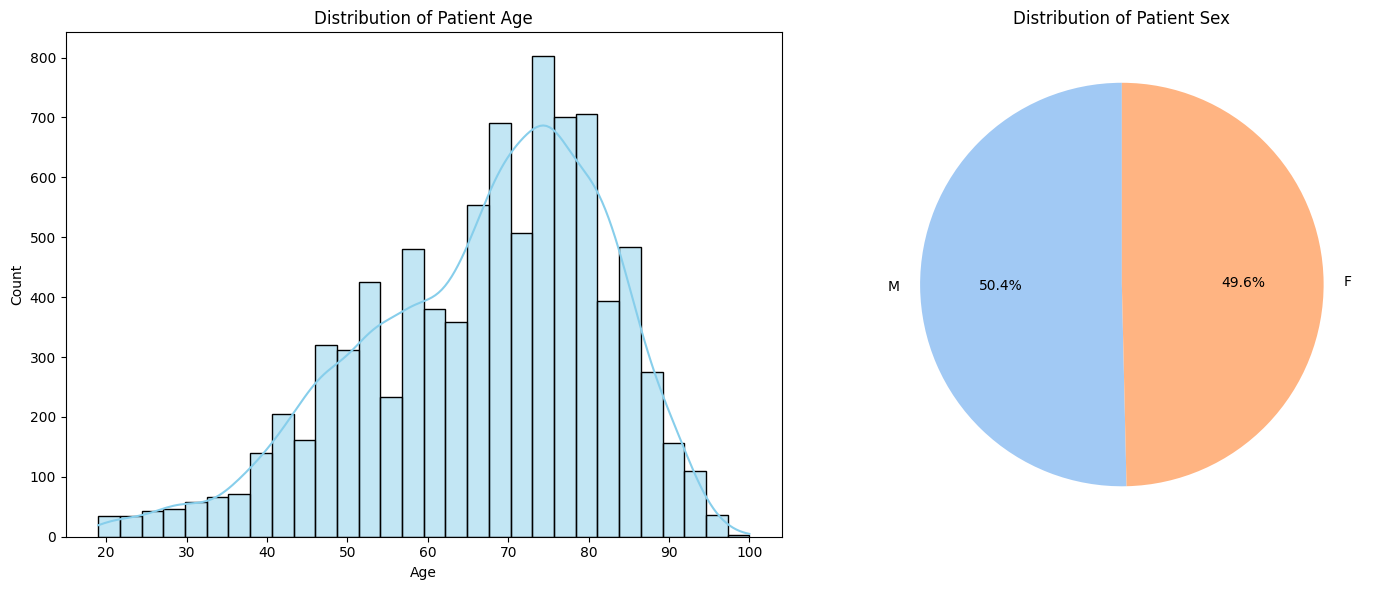

/tmp/ipykernel_147189/227852144.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='PatientSex_DICOM', y='PatientAge', palette='muted')


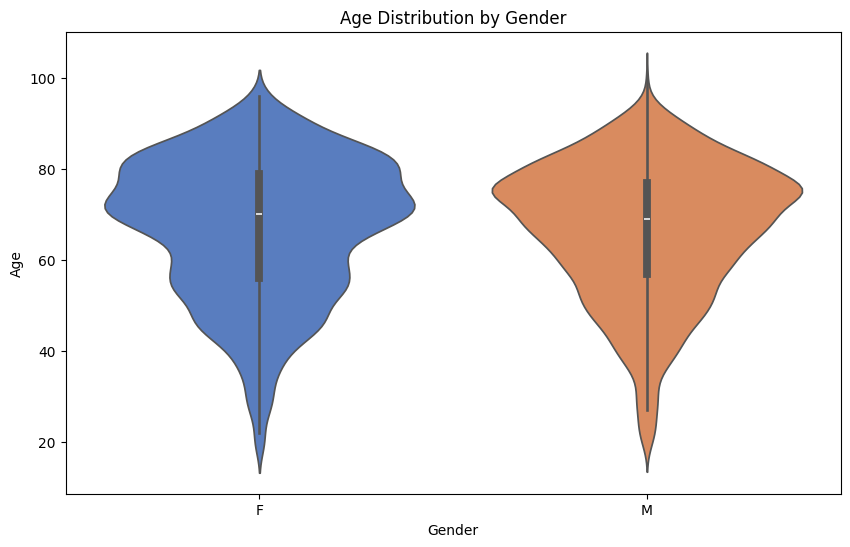


Age Statistics:
count    8787.000000
mean       66.888016
std        15.131512
min        19.000000
25%        57.000000
50%        69.000000
75%        78.000000
max       100.000000
Name: PatientAge, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 6))

# 1. Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='PatientAge', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Gender Distribution
plt.subplot(1, 2, 2)
gender_counts = df['PatientSex_DICOM'].value_counts()
colors = sns.color_palette('pastel')[0:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Patient Sex')

plt.tight_layout()
plt.show()

# Age Distribution by Gender (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='PatientSex_DICOM', y='PatientAge', palette='muted')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Print descriptive statistics
print("\nAge Statistics:")
print(df['PatientAge'].describe())

## Study Validation Analysis

/tmp/ipykernel_147189/295976858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='study_is_validation', palette='viridis')


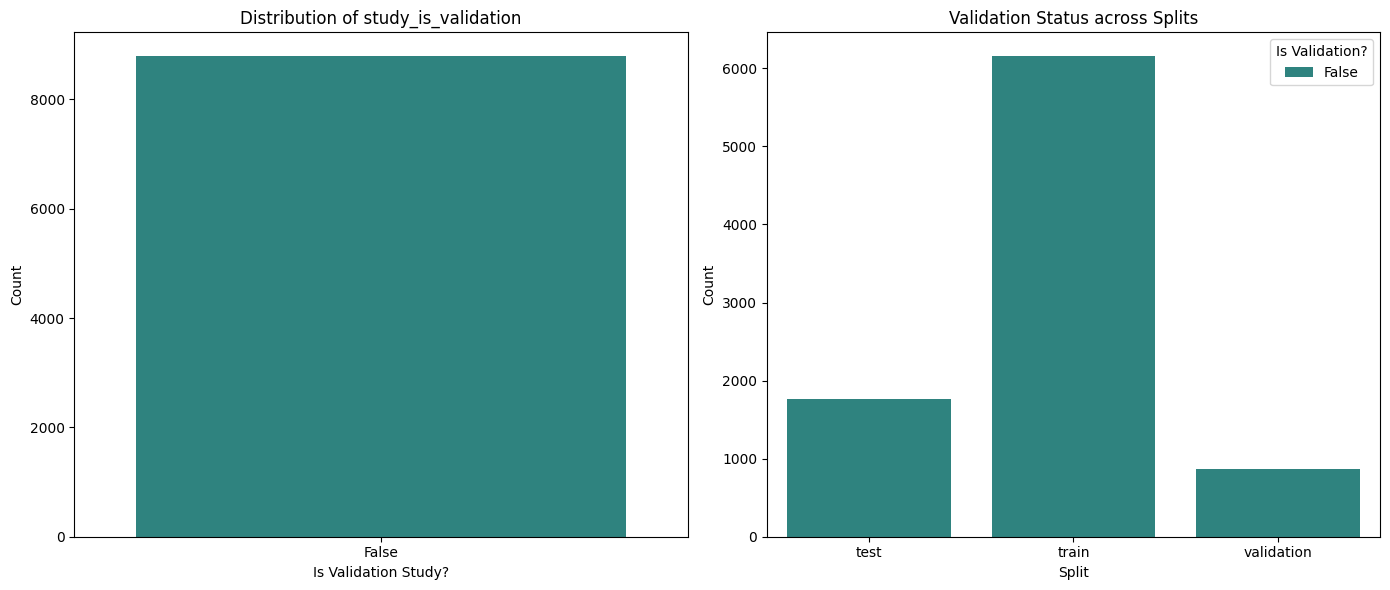

Validation Status Counts:
study_is_validation
False    8787
Name: count, dtype: int64

Percentage:
study_is_validation
False    100.0
Name: count, dtype: float64

Crosstab (Split vs Validation):
study_is_validation  False
split                     
test                  1762
train                 6153
validation             872


In [18]:
# Visualize study_is_validation
plt.figure(figsize=(14, 6))

# 1. Count Plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='study_is_validation', palette='viridis')
plt.title('Distribution of study_is_validation')
plt.xlabel('Is Validation Study?')
plt.ylabel('Count')

# 2. Relationship with Split
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='split', hue='study_is_validation', palette='viridis')
plt.title('Validation Status across Splits')
plt.xlabel('Split')
plt.ylabel('Count')
plt.legend(title='Is Validation?')

plt.tight_layout()
plt.show()

# Calculate exact percentages
val_counts = df['study_is_validation'].value_counts()
print("Validation Status Counts:")
print(val_counts)
print("\nPercentage:")
print(val_counts / len(df) * 100)

# Cross-tabulation
print("\nCrosstab (Split vs Validation):")
print(pd.crosstab(df['split'], df['study_is_validation']))

## Benchmark Status Analysis

/tmp/ipykernel_147189/792234093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='study_is_benchmark', palette='magma')
/tmp/ipykernel_147189/792234093.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='patient_is_benchmark', palette='magma')


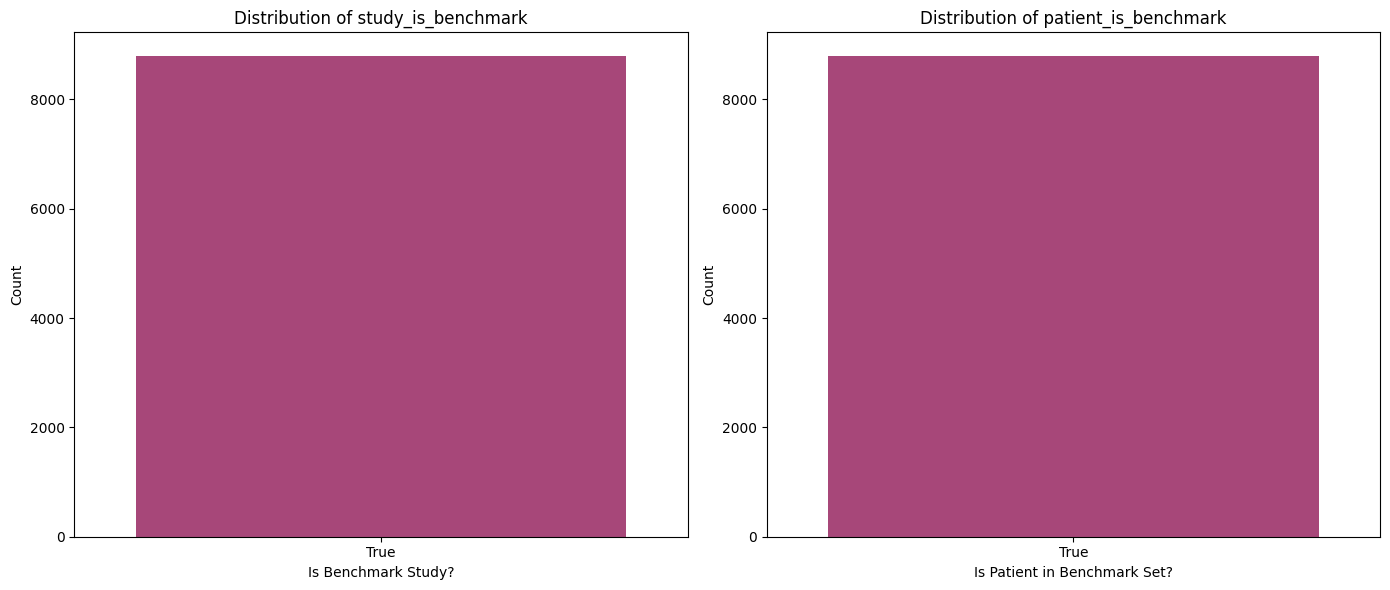

Study Benchmark Counts:
study_is_benchmark
True    8787
Name: count, dtype: int64

Patient Benchmark Counts:
patient_is_benchmark
True    8787
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(14, 6))

# 1. Study Benchmark Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='study_is_benchmark', palette='magma')
plt.title('Distribution of study_is_benchmark')
plt.xlabel('Is Benchmark Study?')
plt.ylabel('Count')

# 2. Patient Benchmark Distribution
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='patient_is_benchmark', palette='magma')
plt.title('Distribution of patient_is_benchmark')
plt.xlabel('Is Patient in Benchmark Set?')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Show the counts and percentages
print("Study Benchmark Counts:")
print(df['study_is_benchmark'].value_counts())
print("\nPatient Benchmark Counts:")
print(df['patient_is_benchmark'].value_counts())


## Normal vs Pathology Distribution

/tmp/ipykernel_147189/1301497390.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette=colors)


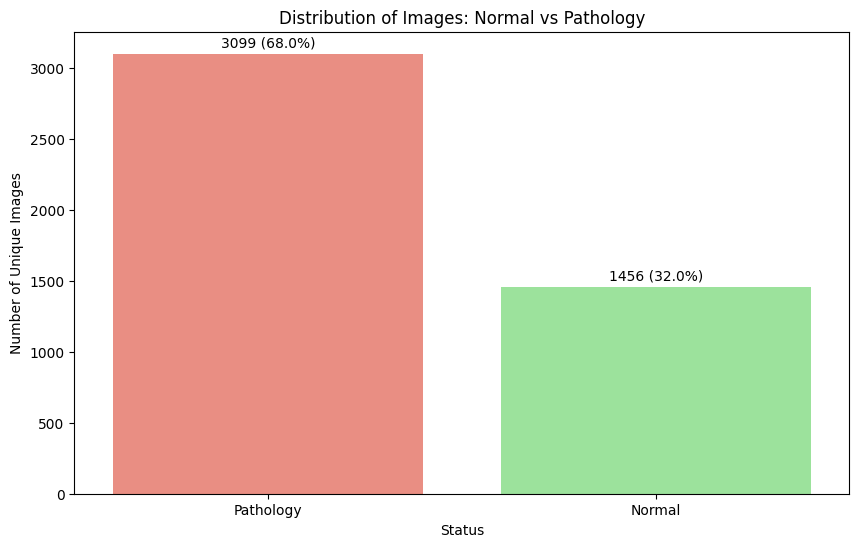

Image Status Counts:
label
Pathology    3099
Normal       1456
Name: count, dtype: int64


In [21]:
# Classify each image
# Group by ImageID and get all labels for each image
image_labels = df.groupby('ImageID')['label'].apply(set)

def classify_image(labels):
    if 'Normal' in labels and len(labels) == 1:
        return 'Normal'
    elif 'Normal' in labels and len(labels) > 1:
        return 'Ambiguous (Normal + Pathology)' # Data quality issue or complex case
    else:
        return 'Pathology'

image_status = image_labels.apply(classify_image)
status_counts = image_status.value_counts()

# Visualization
plt.figure(figsize=(10, 6))
colors = {'Normal': 'lightgreen', 'Pathology': 'salmon', 'Ambiguous (Normal + Pathology)': 'orange'}
sns.barplot(x=status_counts.index, y=status_counts.values, palette=colors)
plt.title('Distribution of Images: Normal vs Pathology')
plt.xlabel('Status')
plt.ylabel('Number of Unique Images')

# Add percentage labels
total = sum(status_counts.values)
for i, count in enumerate(status_counts.values):
    plt.text(i, count + 50, f"{count} ({count/total*100:.1f}%)", ha='center')

plt.show()

# Print detailed counts
print("Image Status Counts:")
print(status_counts)

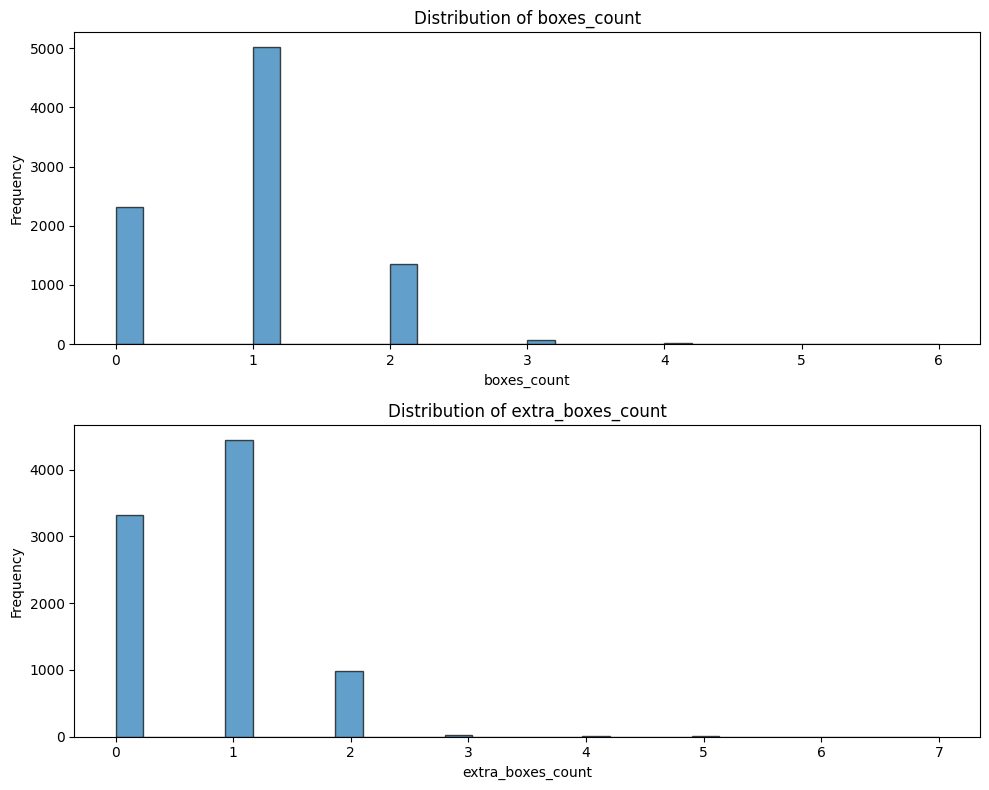

In [17]:
# Kolon isimlerini liste olarak ver
selected_cols = ['boxes_count', 'extra_boxes_count']

if selected_cols:
    fig, axes = plt.subplots(len(selected_cols), 1, figsize=(10, 4 * len(selected_cols)))

    # Tek kolon varsa axes iterable olsun
    if len(selected_cols) == 1:
        axes = [axes]

    for idx, col in enumerate(selected_cols):
        axes[idx].hist(
            df[col].dropna(),
            bins=30,
            edgecolor='black',
            alpha=0.7
        )
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("No columns to visualize")
